Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

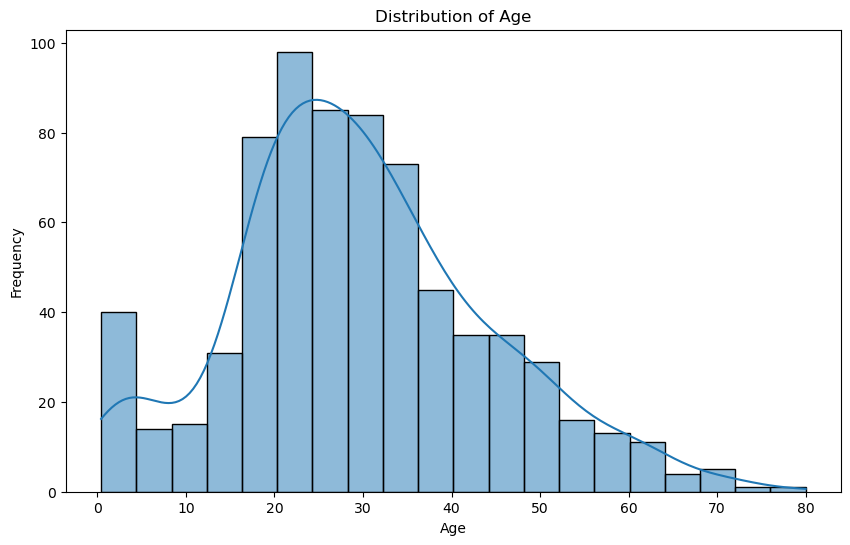

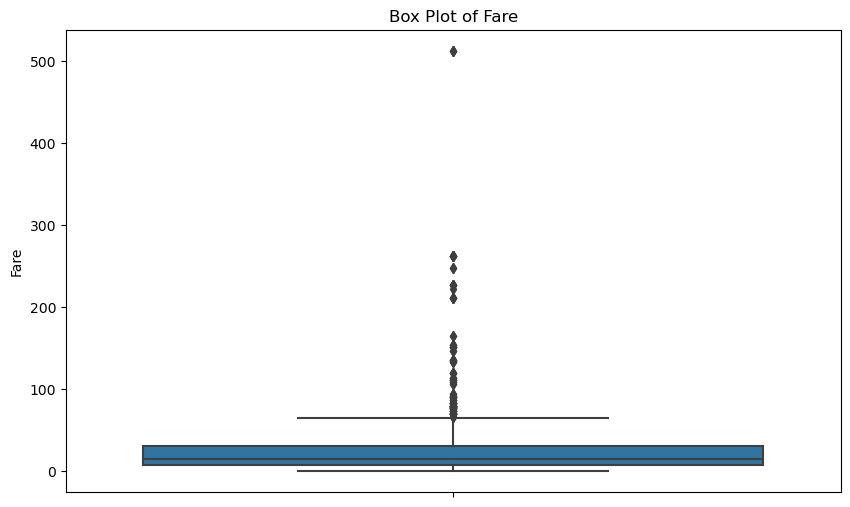

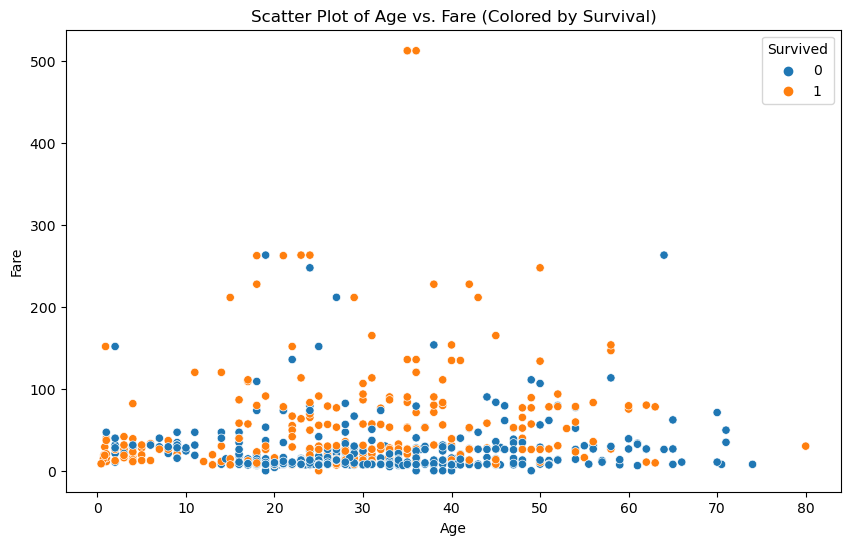

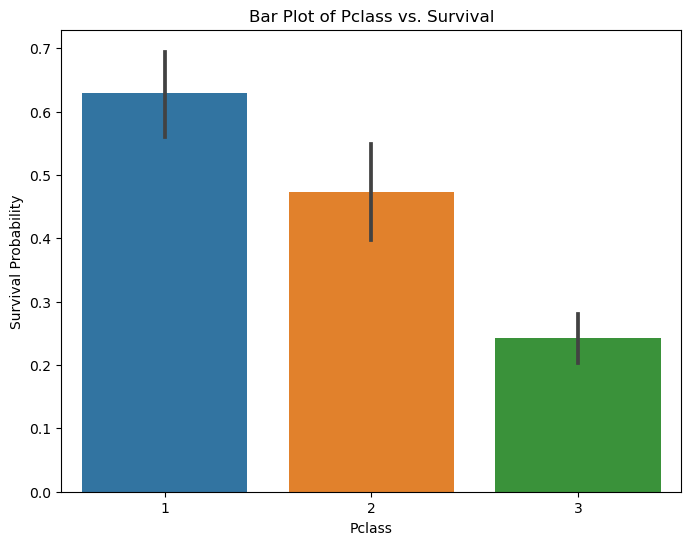

In [1]:
import pandas as pd

# Load the Titanic dataset
train_data = pd.read_csv("C:/Users/shiva/Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv")
test_data = pd.read_csv("C:/Users/shiva/Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_test.csv")

# Display the first few rows of the dataset
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

# Check for missing values
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# Explore data distributions using histograms and box plots
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of Fare
plt.figure(figsize=(10, 6))
sns.boxplot(y='Fare', data=train_data)
plt.title('Box Plot of Fare')
plt.ylabel('Fare')
plt.show()

# Visualize relationships between features and survival
# Scatter plot of Age vs. Fare colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Scatter Plot of Age vs. Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Bar plot of Pclass vs. Survival
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Bar Plot of Pclass vs. Survival')
plt.xlabel('Pclass')
plt.ylabel('Survival Probability')
plt.show()


In [9]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to drop one column to avoid multicollinearity
train_encoded = pd.DataFrame(encoder.fit_transform(train_data[['Sex', 'Embarked']]),
                             columns=['Sex_' + str(cat) for cat in encoder.categories_[0][1:]] +
                                     ['Embarked_' + str(cat) for cat in encoder.categories_[1][1:]])
test_encoded = pd.DataFrame(encoder.transform(test_data[['Sex', 'Embarked']]),
                            columns=['Sex_' + str(cat) for cat in encoder.categories_[0][1:]] +
                                    ['Embarked_' + str(cat) for cat in encoder.categories_[1][1:]])

# Concatenate encoded features with original dataset
train_data_encoded = pd.concat([train_data, train_encoded], axis=1)
test_data_encoded = pd.concat([test_data, test_encoded], axis=1)

# Drop original categorical columns
train_data_encoded.drop(['Sex', 'Embarked'], axis=1, inplace=True)
test_data_encoded.drop(['Sex', 'Embarked'], axis=1, inplace=True)

# Split the preprocessed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data_encoded.drop('Survived', axis=1),
                                                    train_data_encoded['Survived'],
                                                    test_size=0.2,
                                                    random_state=42)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Titanic dataset
train_data = pd.read_csv("C:/Users/shiva/Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv")
test_data = pd.read_csv("C:/Users/shiva/Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_test.csv")

# Preprocessing steps (you may need to customize this based on your data)
# For demonstration purposes, let's assume we're only using numerical features
# and filling missing values with the median
numerical_features = ['Age', 'Fare']
X = train_data[numerical_features].fillna(train_data[numerical_features].median())
y = train_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build predictive models using LightGBM and XGBoost algorithms
lgbm_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Train the models on the training set
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

accuracy_lgbm, precision_lgbm, recall_lgbm, f1_lgbm = evaluate_model(y_test, y_pred_lgbm)
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = evaluate_model(y_test, y_pred_xgb)

print("LightGBM Model Performance:")
print("Accuracy:", accuracy_lgbm)
print("Precision:", precision_lgbm)
print("Recall:", recall_lgbm)
print("F1-score:", f1_lgbm)

print("\nXGBoost Model Performance:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [3]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.0/99.8 MB 279.3 kB/s eta 0:05:58
   ---------------------------------------- 0.1/99.8 MB 581.0 kB/s eta 0:02:52
   ---------------------------------------- 0.1/99.8 MB 708.1 kB/s eta 0:02:21
   ---------------------------------------- 0.2/99.8 MB 942.1 kB/s eta 0:01:46
   ---------------------------------------- 0.3/99.8 MB 999.9 kB/s eta 0:01:40
   ----------------------------------

In [12]:
# Compare the performance metrics of LightGBM and XGBoost models
performance_metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgbm, accuracy_xgb],
    'Precision': [precision_lgbm, precision_xgb],
    'Recall': [recall_lgbm, recall_xgb],
    'F1-score': [f1_lgbm, f1_xgb]
}

df_metrics = pd.DataFrame(performance_metrics)
print("\nPerformance Metrics Comparison:")
print(df_metrics)



Performance Metrics Comparison:
      Model  Accuracy  Precision    Recall  F1-score
0  LightGBM  0.709497    0.72000  0.486486  0.580645
1   XGBoost  0.664804    0.62963  0.459459  0.531250
